github: [ptonso](https://github.com/ptonso)

# Questionário 3 - Introdução à ciência de dados

## Limpeza e setup

Nessa seção, iremos importar as ferramentas, limpar os dados e organizá-los para a modelagem


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

seed = 123


In [2]:
iris = pd.read_csv("data/iris.csv")

iris_y = iris['species']
iris_X = iris.iloc[:,:-1]


In [3]:

iris_scaler = StandardScaler()
iris_X = np.array(iris_scaler.fit_transform(iris_X))

iris_le = LabelEncoder()
iris_le.fit(iris_y)
iris_y = iris_le.transform(iris_y)


In [4]:
vehicle = pd.read_csv("data/Vehicle.csv")

vehicle_y = vehicle['Class']
vehicle_X = vehicle.iloc[:,:-1]

vehicle_scaler = StandardScaler()
vehicle_X = np.array(vehicle_scaler.fit_transform(vehicle_X))

vehicle_le = LabelEncoder()
vehicle_le.fit(vehicle_y)
vehicle_y = vehicle_le.transform(vehicle_y)



In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
moon_X = data[0]
moon_y = data[1]

In [6]:

test_size = 0.3

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=test_size, random_state=seed)
vehicle_X_train, vehicle_X_test, vehicle_y_train, vehicle_y_test = train_test_split(vehicle_X, vehicle_y, test_size=test_size, random_state=seed)
moon_X_train, moon_X_test, moon_y_train, moon_y_test = train_test_split(moon_X, moon_y, test_size=test_size, random_state=seed)


data = {
    'iris': {
        'X_train':iris_X_train,
        'X_test':iris_X_test,
        'y_train':iris_y_train,
        'y_test':iris_y_test,
    },
    'vehicle': {
        'X_train':vehicle_X_train,
        'X_test':vehicle_X_test,
        'y_train':vehicle_y_train,
        'y_test':vehicle_y_test,
    }}

## Questão 1

_Considere as bases Iris e Vehicle. Em um mesmo gráfico, mostre a acurácia em função de k para o método k-vizinhos_

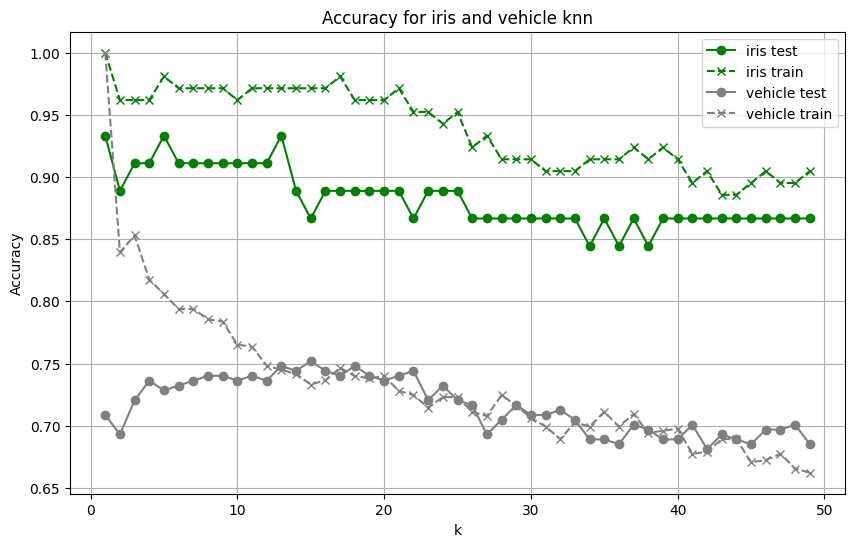

In [7]:

results = {'iris':{},
           'vehicle':{}}

def experiment():

    def train_model(model, df_name):
        model.fit(data[df_name]['X_train'], data[df_name]['y_train'])
        test_yhat = model.predict(data[df_name]['X_test'])
        test_acc = accuracy_score(test_yhat, data[df_name]['y_test'])

        train_yhat = model.predict(data[df_name]['X_train'])
        train_acc = accuracy_score(train_yhat, data[df_name]['y_train'])
        return [test_acc, train_acc]

    for df_name in results.keys():
        results[df_name]['knn'] = {}
        for k in range(1,50):
            knn = KNeighborsClassifier(n_neighbors=k)
            logreg = LogisticRegression(max_iter=1000)
            results[df_name]['knn'][str(k)] = train_model(knn, df_name)
        
        results[df_name]['logistic'] = train_model(logreg, df_name)

    return results

results = experiment()

colors = {
    'iris': 'green',
    'vehicle': 'gray',
}

plt.figure(figsize=(10, 6))

for dataset, model_results in results.items():
    knn_results = model_results['knn']
    ks = list(map(int, knn_results.keys()))
    test_acc = [acc[0] for acc in knn_results.values()]
    train_acc = [acc[1] for acc in knn_results.values()]

    plt.plot(ks, test_acc, label=f'{dataset} test', color=colors[dataset], linestyle='-', marker='o')
    plt.plot(ks, train_acc, label=f'{dataset} train', color=colors[dataset], linestyle='--', marker='x')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for iris and vehicle knn')
plt.legend()
plt.grid(True)
plt.show()

no gráfico, nota-se a acurácia do algoritmo knn alterando o hyperparâmetro $k$, parao treino e o teste.

Nota-se que conforme o $k$ aumenta no dataset vehicle, o knn se mantém em overfit até atingir $k=13$, onde a distância entre a acurácia do treino e teste diminui, enquanto a acurácia do teste atinge seu máximo.

No caso do dataset iris, nota-se outro padrão, em que observa-se overfit (avaliado pela distância entre a acurácia do teste e treino) independentendemente do parâmetro $k$.

## Questão 2

_Considere os dados gerados com o código abaixo e obtenha as regiões de separação usando o método k-vizinhos para diferentes valores de k. Compare com as regiões obtidas usando o método regressão logística._

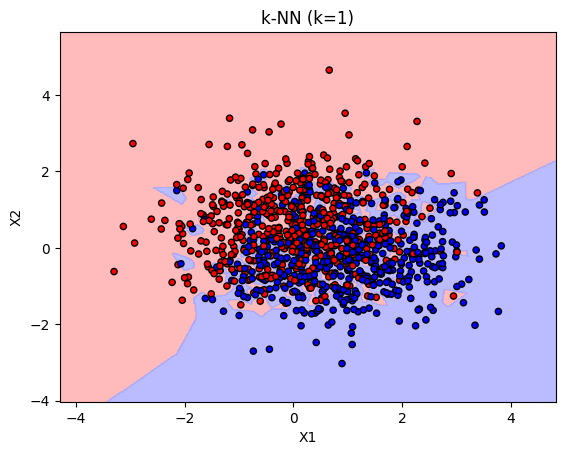

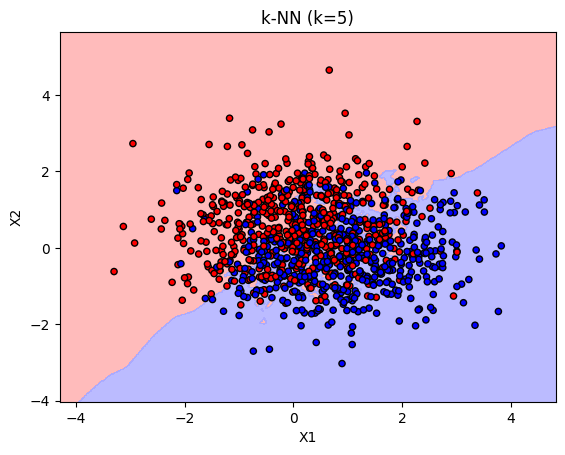

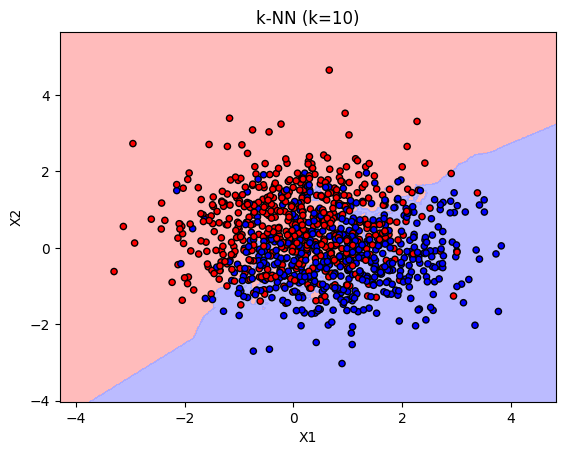

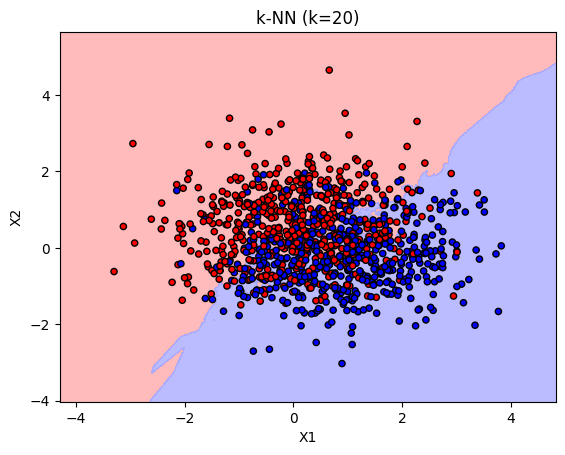

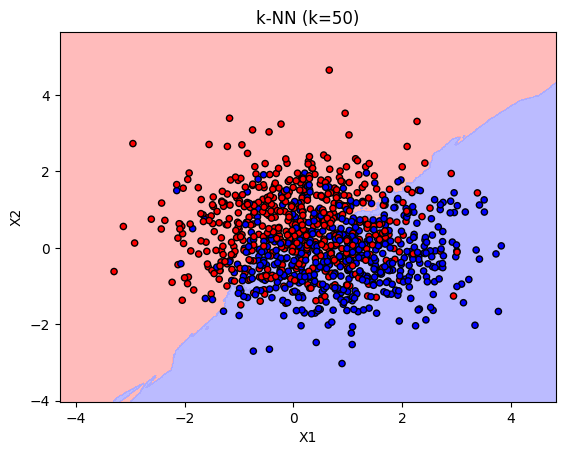

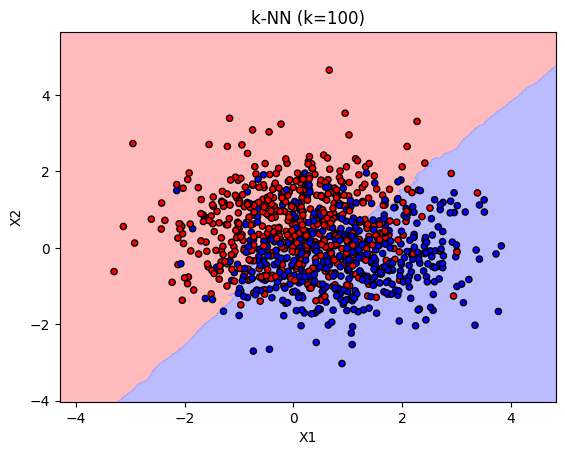

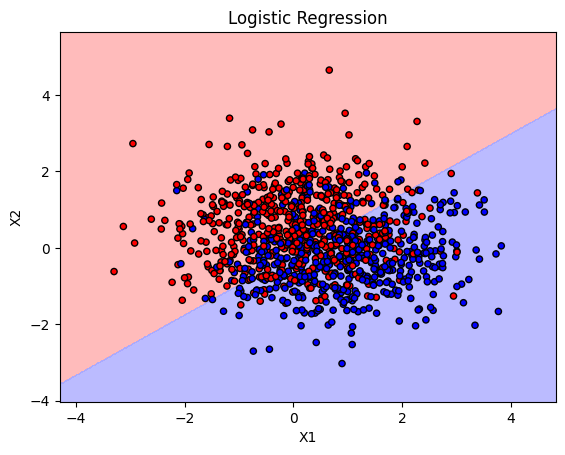

In [8]:


def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.show()


X = moon_X
y = moon_y

for k in [1, 5, 10, 20, 50, 100]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plot_decision_boundary(X, y, knn, title=f'k-NN (k={k})')

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)
plot_decision_boundary(X, y, logreg, title='Logistic Regression')


Pela progressão dos gráficos do knn, nota-se que conforme utilizamos um $k$ maior, a região de separação se aproxima cada vez mais da região obtida pela regressão logística, um corte linear no espaço das features.

## Questão 3

Classifique as bases Iris e Vehicle usando regressão logística e compare com o método k-vizinhos

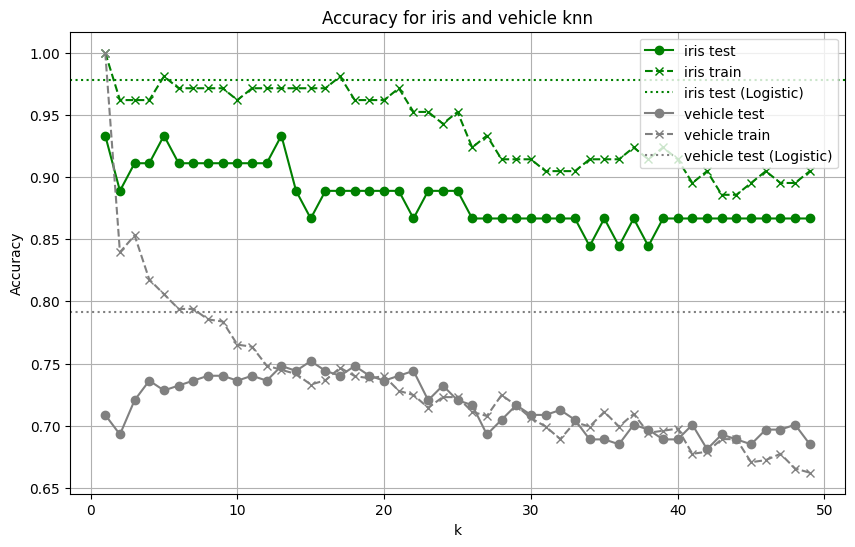

In [9]:

plt.figure(figsize=(10, 6))

for dataset, model_results in results.items():
    knn_results = model_results['knn']
    ks = list(map(int, knn_results.keys()))
    test_acc = [acc[0] for acc in knn_results.values()]
    train_acc = [acc[1] for acc in knn_results.values()]

    plt.plot(ks, test_acc, label=f'{dataset} test', color=colors[dataset], linestyle='-', marker='o')
    plt.plot(ks, train_acc, label=f'{dataset} train', color=colors[dataset], linestyle='--', marker='x')

    logistic_test_acc = model_results['logistic'][0]
    plt.axhline(y=logistic_test_acc, color=colors[dataset], linestyle=':', label=f'{dataset} test (Logistic)')



plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for iris and vehicle knn')
plt.legend()
plt.grid(True)
plt.show()

No grágico, a linha horizontal tracejada representa a acurácia da regressão logística no dataset de teste.

Nota-se uma performance claramente superior da regressão logística em relação ao knn para ambas as bases de dados
